# Análisis por discriminación lineal (LDA)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Datos

Supongamos que tenemos dos distribuciones normales multivariadas. Es decir, cada distribución tiene media 0. Y cada distribución tiene 5000 muestras.

In [ ]:
mu0 = [0, 0] ##Si el vector de medias no es cero siempre se puede centrar
sigma0 = np.array([[1, 0.5], [0.5, 1]]) ##Estas matrices son simétricas y positivas definidas
sigma1 = np.array([[1, 0.5], [0.5, 1]])

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X

array([[-1.10084614, -1.71260256],
       [ 0.99389447, -0.07907416],
       [ 0.40130436, -1.90023434],
       ...,
       [ 0.45822206,  0.53118063],
       [ 0.08349701, -0.9306468 ],
       [ 0.77323147, -0.66463842]])

In [ ]:
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

In [ ]:
y = np.ones((5000,))
y[:2000] = 0

In [ ]:
X[:6, :], y[:6]

(array([[-1.10084614, -1.71260256],
        [ 0.99389447, -0.07907416],
        [ 0.40130436, -1.90023434],
        [-1.13044786, -1.89165476],
        [-0.15161077, -0.40098115],
        [-0.23615226, -2.29629297]]),
 array([0., 0., 0., 0., 0., 0.]))

### Visualización

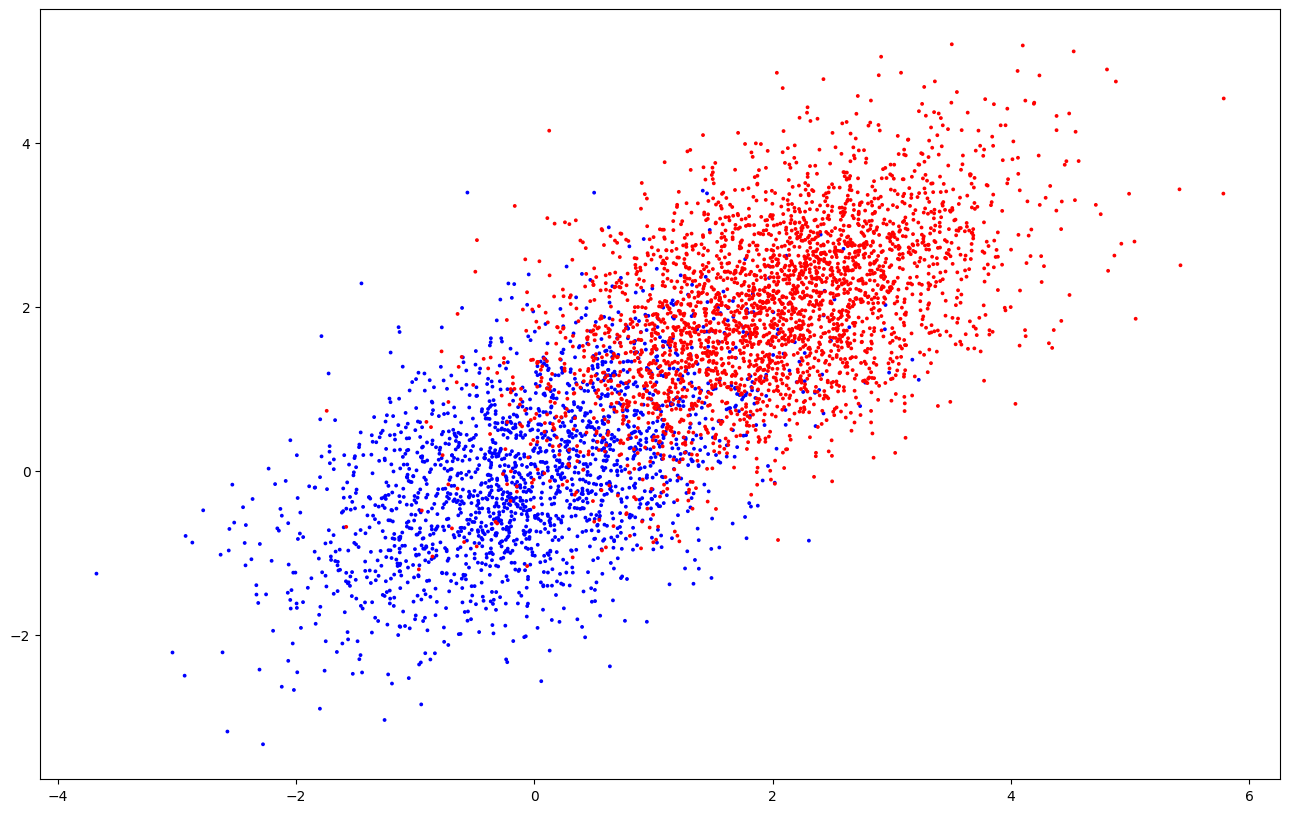

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

### Regla de Clasificación

Tenemos que:

$$ f(x \vert y) = \frac{1}{\vert 2 \pi \Sigma \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu)^T (\Sigma)^{-1} (x - \mu)\big) $$

En el caso de clasificación binaria (como el caso anterior), podemos expresar los dos tipos de casos de probabilidad condicional que $y=0$ y $y=1$.

$$ f(x \vert y=0) = \frac{1}{\vert 2 \pi \Sigma^{(0)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(0)})^T (\Sigma^{(0)})^{-1} (x - \mu^{(0)})\big)\\
f(x \vert y=1) = \frac{1}{\vert 2 \pi \Sigma^{(1)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(1)})^T (\Sigma^{(1)})^{-1} (x - \mu^{(1)})\big) $$


In [ ]:
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

In [ ]:
f_x_y_0(np.array([[0.5], [0.5]]))

0.1555632781262252

In [ ]:
f_x_y_1(np.array([[0.5], [0.5]]))

0.041006034909973794

Media muestral y covarianza muestral.

In [ ]:
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

(array([-0.01727537, -0.00819894]),
 array([[0.97758619, 0.50946756],
        [0.50946756, 1.02780036]]))

In [ ]:
mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

(array([1.98597591, 1.98722013]),
 array([[0.98681518, 0.51174645],
        [0.51174645, 1.02249132]]))

In [ ]:
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

In [ ]:
fhat_x_y_0(np.array([[0.5], [0.5]]))

0.15444339976121843

In [ ]:
fhat_x_y_1(np.array([[0.5], [0.5]]))

0.0428993452674344

De hecho, ya conocemos la distribución de la etiqueta. Usando esto, podemos calcular la probabilidad de Bayes. La fórmula de la regla de Bayes es la siguiente:

$$ P(Y = y \vert X = x) = \frac{f(x \vert Y = y)P(Y = y)}{f(x \vert y = 0) P(Y = 0) + f(x \vert y=1)P(Y=1)} $$

In [ ]:
p0 = 2000/5000
p1 = 1 - p0

def bayes_prob(x, y):
    if y == 1:
        return f_x_y_1(x) * p1 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)
    else:
        return f_x_y_0(x) * p0 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 0)

0.7166425945408171

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 1)

0.2833574054591828

Also, we can estimate it with our hypothesis.

In [ ]:
p0_hat = 2000 / 5000
p1_hat = 3000 / 5000

def bayes_prob_hat(x, y):
    if y == 1:
        return fhat_x_y_1(x) * p1_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)
    else:
        return fhat_x_y_0(x) * p0_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)

bayes_prob_hat(np.array([[0.5], [0.5]]), 0), bayes_prob_hat(np.array([[0.5], [0.5]]), 1)

(0.7058900916737804, 0.2941099083262196)

Se confirma que el dato (`[0.5], [0.5]`) se clsifica con la etiqueta `0`.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd', store_covariance=True).fit(X, y)

In [ ]:
lda.means_

array([[-0.01727537, -0.00819894],
       [ 1.98597591,  1.98722013]])

In [ ]:
mu0 = lda.means_[0, :]
mu1 = lda.means_[1, :]
lda_cov = lda.covariance_

mu0, mu1, lda_cov

(array([-0.01727537, -0.00819894]),
 array([1.98597591, 1.98722013]),
 array([[0.9827307 , 0.51063065],
        [0.51063065, 1.02420488]]))

Usando un discriminador entrenado, podemos calcular la probabilidad de cada etiqueta. Para hacer esto, necesitamos implementar la función delta para expresarlo.
La fórmula de la función delta es así.

$$ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu^T_k \Sigma^{-1} \mu_k + \log \pi_k $$



In [ ]:
def discriminator(x):
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(p0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(p1)
    return [d0[0], d1[0]]

In [ ]:
discriminator(np.array([[0.5], [0.5]]))

[-0.9249863808698647, -1.8060037231723192]

In [ ]:
np.argmax(discriminator(np.array([[0.5], [0.5]])))

0

¿Qué pasa con la precisión del modelo LDA ajustado?

In [ ]:
y_hat = np.apply_along_axis(lambda x: np.argmax(discriminator(np.reshape(x, (2, 1)))), 1, X)

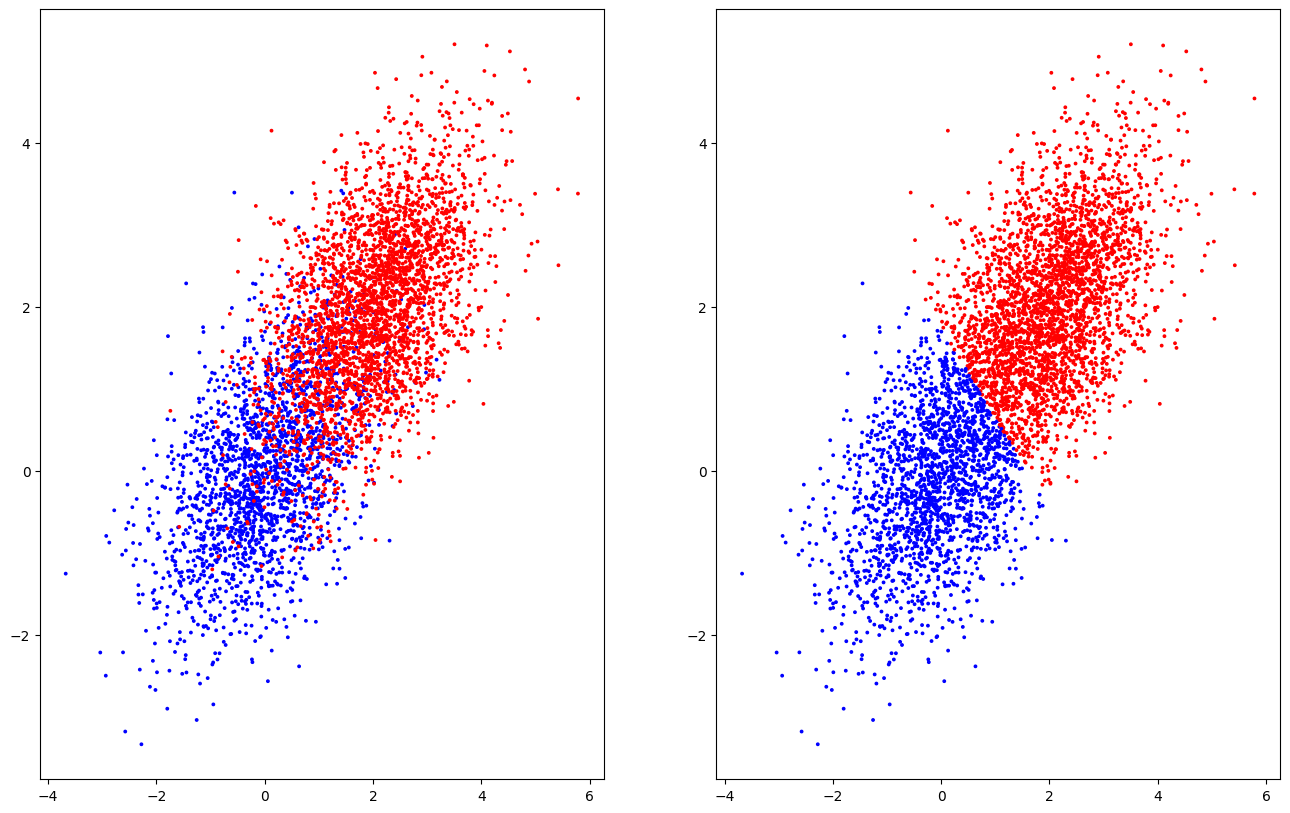

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
ax[1].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y_hat)))
plt.show()

In [ ]:
(y == y_hat).mean()

0.879

In [ ]:
import numpy as np

diccionario={"M1":np.random.binomial(1000,0.3,100),
             "M2":np.random.binomial(1000,0.6,100),
             "M3":np.random.binomial(1000,0.4,100),
             "M4":np.random.binomial(1000,0.8,100),}

In [ ]:
import pandas as pd

np.random.seed(1)

df=pd.DataFrame(diccionario)
df

,M1,M2,M3,M4
0,297,618,388,803
1,291,606,404,803
2,304,614,401,803
3,298,579,413,820
4,302,606,417,806
...,...,...,...,...
95,283,585,416,806
96,288,576,397,804
97,300,596,418,812
98,304,658,407,800


In [ ]:
df.info

<bound method DataFrame.info of      M1   M2   M3   M4
0   297  618  388  803
1   291  606  404  803
2   304  614  401  803
3   298  579  413  820
4   302  606  417  806
..  ...  ...  ...  ...
95  283  585  416  806
96  288  576  397  804
97  300  596  418  812
98  304  658  407  800
99  304  615  404  796

[100 rows x 4 columns]>

In [ ]:
# Escoger columnas

df['M1']

0     297
1     291
2     304
3     298
4     302
     ... 
95    283
96    288
97    300
98    304
99    304
Name: M1, Length: 100, dtype: int64

In [ ]:
np.mean(df['M1'])

297.52

In [ ]:
np.var(df['M1'],ddof=1)

214.9591919191918

In [ ]:
type(df["M1"])

pandas.core.series.Series

In [ ]:
#Vamos a seleccionar dos columnas

df[["M1","M2"]]

,M1,M2
0,297,618
1,291,606
2,304,614
3,298,579
4,302,606
...,...,...
95,283,585
96,288,576
97,300,596
98,304,658


In [ ]:
df.iloc[99].mean()

529.75

In [ ]:
df.ndim

2

In [ ]:
df.mean(0) #Media por columnas

M1    297.52
M2    600.26
M3    401.39
M4    800.74
dtype: float64

In [ ]:
df.mean(1) #Media por renglones

0     526.50
1     526.00
2     530.50
3     527.50
4     532.75
       ...  
95    522.50
96    516.25
97    531.50
98    542.25
99    529.75
Length: 100, dtype: float64

In [ ]:
df[0::51]
##Para indicar un rango se usa :
##Para especificar sólo dos renglones se usa ::

NameError: name 'df' is not defined

In [ ]:
df.rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [ ]:
df.std()

M1    14.661487
M2    16.995317
M3    15.296989
M4    12.473503
dtype: float64